In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\workdir\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Láthatjuk, hogy az amount mean-je elég kevés, 88 usd, vagyis az adathalmaz többnyire kisebb tranzakciókat tartalmaz.

In [4]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Úgy néz ki nincsenek null értékek.

99.8273
0.1727


<Axes: xlabel='Class', ylabel='count'>

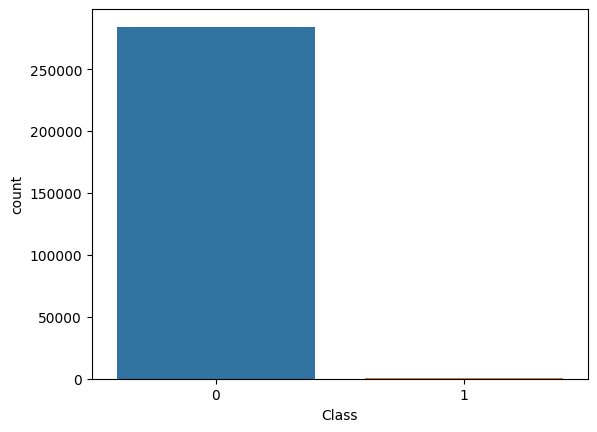

In [5]:
print(round(df['Class'].value_counts()[0]/len(df) * 100,4))
print(round(df['Class'].value_counts()[1]/len(df) * 100,4))

sns.countplot(x=df['Class'])

Az adathalmazunk rendkívül egyenlőtlen, láthatjuk, hogy csupán 0.17% a csalások aránya az összes tranzakcióhoz képest. Ez később problémát okozhat nekünk, hiszen ha így tanítanánk be egy prediktív algoritmust, szinte biztos, hogy nagyon sok hamis negatív eredményt adna vissza, vagyis olyan csalást is normális tranzakciónak fog hinni, ami valójában nem az. Ezt a jelenséget hívjuk overfitting-nek, vagy magyarul túltanulásnak, amikor az algoritmusunk túlságosan hajlik az célváltozó egyik értékének irányába, mivel túl nagy az egyenlőtlenség az adathalmazban. Mielőtt azonban ezt a problémát orvosolnánk, jobb, ha skálázzuk az Amount és Time változókat is, tekintve, hogy az összes többi változónk már korábban skálázva lett, köszönhetően a PCA transzformálásnak. 

In [6]:
scaler = RobustScaler()

df['amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Következő lépésként Random Undersampling technikát fogok alkalmazni. ---ide több szöveg kell

In [8]:
print(df['Class'].value_counts()[0])
print(df['Class'].value_counts()[1])

284315
492


Láthatjuk, hogy 492 olyan adatsorunk van, ami csalás volt. Ezért a Random Undersampling során olyan adathalmazt fogunk kapni, amiben a csalás-nem csalás adatok aránya 492:492 lesz. 

In [9]:
df = df.sample(frac=1)

df_fraud = df.loc[df['Class'] == 1]
df_not_fraud = df.loc[df['Class'] == 0][:492]

df_normal_dist = pd.concat([df_fraud, df_not_fraud])
new_df = df_normal_dist.sample(frac=1, random_state=42)
new_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
46710,-1.324550,-0.038655,-1.242113,-0.737811,2.822389,2.959693,-0.823339,1.553326,0.270307,-1.655354,...,-0.350245,-0.166664,0.886627,0.374392,0.477721,0.132096,-0.118040,0,0.181653,-0.491042
243699,-4.320609,3.199939,-5.799736,6.502330,0.378479,-1.948246,-2.167860,-0.728207,-1.977238,-3.473411,...,0.434278,-0.136940,-0.620072,0.642531,0.280717,-2.649107,0.533641,1,-0.293440,0.791175
241303,-0.775449,0.622395,0.706857,4.327298,-0.299804,2.402253,1.782489,0.003967,-2.313409,1.369945,...,0.512251,0.322449,0.245911,-0.439106,0.299550,0.221857,0.128928,0,5.266541,0.778651
42887,-12.835760,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,-13.074068,...,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.817680,-0.521030,1,0.214071,-0.509957
213116,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,-4.250717,...,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,1,-0.191434,0.639399


Ezek után láthatjuk, hogy egy tökéletesen kiegyensúlyozott adathalmazt kaptunk, amiben 492 csalás és ugyanennyi valódi tranzakció található. 

Fraud count:  492
Not fraud count:  492


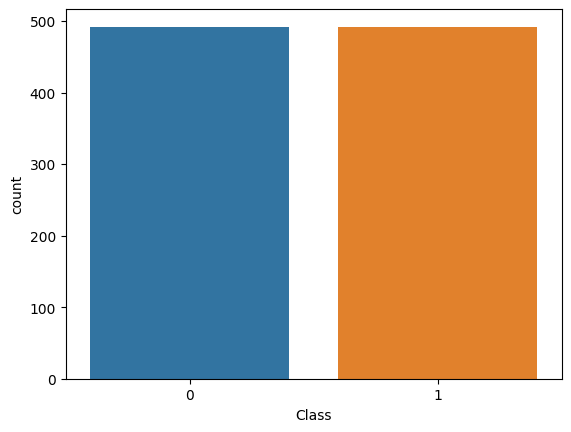

In [10]:

print('Fraud count: ', new_df['Class'].value_counts()[1])
print('Not fraud count: ', new_df['Class'].value_counts()[0])
sns.countplot(x=new_df['Class'])
plt.show()

Mostmár folytathatjuk az adatok kiértékelését. Kezdjük először egy korrelációs mátrixxal.

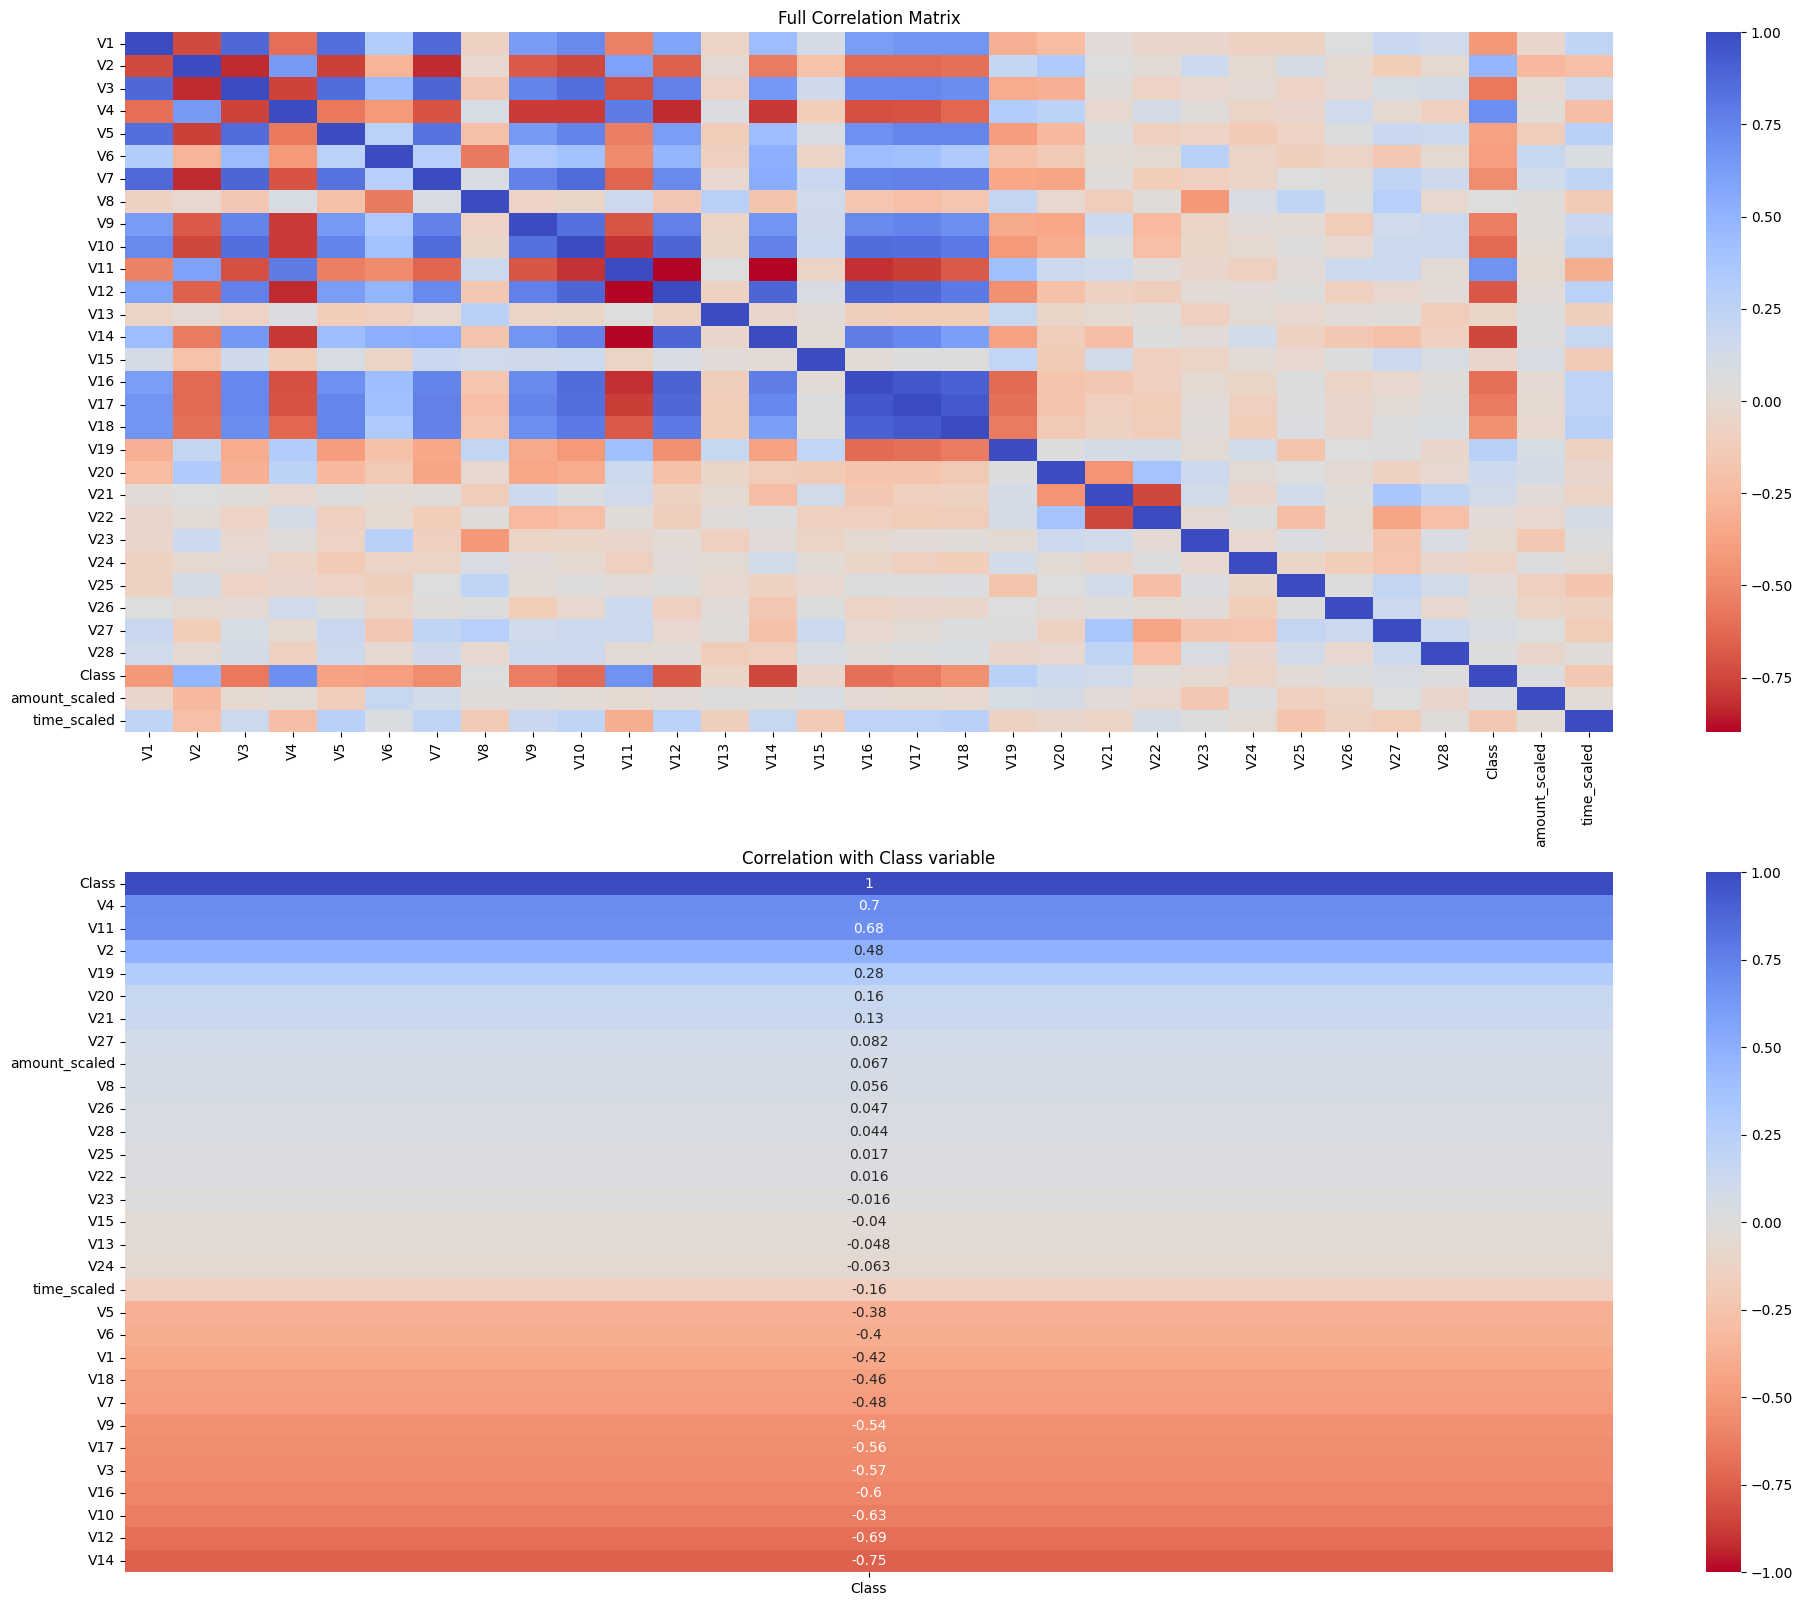

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(new_df.corr(), cmap='coolwarm_r', ax=ax1)
ax1.set_title('Full Correlation Matrix')
sns.heatmap(new_df.corr()[['Class']].sort_values(by='Class', ascending=False),vmin=-1, vmax=1, annot=True,  cmap='coolwarm_r',  ax=ax2)
ax2.set_title('Correlation with Class variable')
plt.show()

Láthatjuk, hogy a v4,v11 pozitív korrelációban áll a Class változóval, ez azt jelenti, hogy minnél nagyobb ezeknek a mértéke, annál nagyobb a valószínűsége, hogy csalás történt. A v2-es változó közepes pozitív korrelációt mutat. Negatív korrelációt pedig a v14,v12 és v10 mutatnak jelentősebb mértékű kapcsolatot, vagyis minnél kisebb az értékük, annál nagyobb az esélye, hogy csalás volt a tranzakció. Negatív korrelációnál több változót is láthatunk, melyek közepes mértékűek, majd meglátjuk, ezek mennyire befolyásolják a modellünket. 